## Cleaning Data

In [1]:
import numpy as np 
import pandas as pd 
import math 
from time import sleep
import time
import os
%matplotlib inline

raw0 = pd.read_csv('https://raw.githubusercontent.com/lukastay/Lukas-Taylor-Portfolio/main/Data_Files/Vaccines_Deployment_Data.csv')
raw1 = pd.read_csv('https://raw.githubusercontent.com/lukastay/Lukas-Taylor-Portfolio/main/Data_Files/Vaccines_Deaths_Data.csv')
raw2 = pd.read_csv('https://raw.githubusercontent.com/lukastay/Lukas-Taylor-Portfolio/main/Data_Files/Vaccines_Country_Data.csv')

for row in range(raw0.shape[0]): raw0.iloc[row,1] = raw0.iloc[row,1] + " " + raw0.iloc[row,0]
for row in range(raw1.shape[0]): raw1.iloc[row,1] = raw1.iloc[row,1] + " " + raw1.iloc[row,0]

StateAbbrev = {"Alabama": "AL","Alaska": "AK","Arizona": "AZ","Arkansas": "AR","California": "CA","Colorado": "CO","Connecticut": "CT","Delaware": "DE","Florida": "FL","Georgia": "GA","Hawaii": "HI","Idaho": "ID","Illinois": "IL","Indiana": "IN","Iowa": "IA","Kansas": "KS","Kentucky": "KY","Louisiana": "LA","Maine": "ME","Maryland": "MD","Massachusetts": "MA","Michigan": "MI","Minnesota": "MN","Mississippi": "MS","Missouri": "MO","Montana": "MT","Nebraska": "NE","Nevada": "NV","New Hampshire": "NH","New Jersey": "NJ","New Mexico": "NM","New York": "NY","North Carolina": "NC","North Dakota": "ND","Ohio": "OH","Oklahoma": "OK","Oregon": "OR","Pennsylvania": "PA","Rhode Island": "RI","South Carolina": "SC","South Dakota": "SD","Tennessee": "TN","Texas": "TX","Utah": "UT","Vermont": "VT","Virginia": "VA","Washington": "WA","West Virginia": "WV","Wisconsin": "WI","Wyoming": "WY","District of Columbia": "DC","American Samoa": "AS","Guam": "GU","Northern Mariana Islands": "MP","Puerto Rico": "PR","United States Minor Outlying Islands": "UM","U.S. Virgin Islands": "VI",}

for row in range (0, raw2.shape[0]): raw2.iloc[row,0] = StateAbbrev.get(raw2.iloc[row,0]); raw2.iloc[row,1] = raw2.iloc[row,0] + " " + raw2.iloc[row,1]

print("Vaccine Deployment Data:\n\n", raw0.head(), "\n---------------------------------------------------\nDeath Rate Data:\n\n", raw1.head(), "\n---------------------------------------------\n Country Data:\n\n", raw2.head())

Vaccine Deployment Data:

                  Recip_County                    Recip_State  \
0      Aleutians East Borough      AK Aleutians East Borough   
1  Aleutians West Census Area  AK Aleutians West Census Area   
2      Anchorage Municipality      AK Anchorage Municipality   
3          Bethel Census Area          AK Bethel Census Area   
4         Bristol Bay Borough         AK Bristol Bay Borough   

   Administered_Dose1_Pop_Pct  Series_Complete_Pop_Pct  Booster_Doses_Vax_Pct  \
0                        86.9                     74.9                   41.2   
1                        77.8                     64.2                   38.5   
2                        79.2                     70.6                   49.4   
3                        73.9                     68.7                   51.4   
4                        95.0                     95.0                   40.7   

   Census2019_5PlusPop  
0               3269.0  
1               5446.0  
2             268042.0  
3

In [2]:
columns=['county', 'deaths','dose1','series','booster','pop','hsgrad','homeownership','under5','over65','female','black','white','percapincome','density','age','deathspercap']
df = pd.DataFrame([[[0] for i in range(len(columns))]], columns = columns)

def createdf():
    
    global df
    
    for i in range (0,raw1.shape[0]-1):
        
        if not raw0.iloc[n,1] == raw1.iloc[i,1]: continue
            
        start=i-200
        end=i+200
        if start < 0: start = 0
        if end > raw2.shape[0]-1: end = raw2.shape[0]-1

        for d in range(start,end):
            
            if not raw0.iloc[n,1] == raw2.iloc[d,1]: continue
            
            df = pd.concat([df, pd.DataFrame([[raw0.iloc[n,1], raw1.iloc[i,3], raw0.iloc[n,2], raw0.iloc[n,3],raw0.iloc[n,4], raw0.iloc[n,5], raw2.iloc[d,2], raw2.iloc[d,3], raw2.iloc[d,4], raw2.iloc[d,5], raw2.iloc[d,6], raw2.iloc[d,7], raw2.iloc[d,8], raw2.iloc[d,9], raw2.iloc[d,11], raw2.iloc[d,14], (raw1.iloc[i,3]/raw0.iloc[n,5])]], columns=columns)])
            return

for n in range (0,raw0.shape[0]-1): createdf()

df = df.dropna()
df = df.iloc[1:,:]
df = df.reset_index()

for column in columns: 
    try:
        df[column] = pd.to_numeric(df[column])
    except:
        pass

print("\n"); print(df.head())



   index                           county  deaths  dose1  series  booster  \
0      0        AK Anchorage Municipality   743.0   79.2    70.6     49.4   
1      0            AK Bethel Census Area    39.0   73.9    68.7     51.4   
2      0  AK Fairbanks North Star Borough   190.0   71.0    63.8     40.9   
3      0       AK Juneau City and Borough    18.0   86.9    79.5     59.4   
4      0       AK Kenai Peninsula Borough    86.0   55.5    49.9     51.8   

        pop  hsgrad  homeownership  under5  over65  female  black  white  \
0  268042.0    93.3           61.7     7.4     9.4    49.2   2.74  59.19   
1   16410.0    80.9           61.3    10.5     7.1    47.7   0.33  10.17   
2   89670.0    94.4           59.8     7.8     8.7    47.2   2.12  71.08   
3   30167.0    95.6           64.0     5.9    11.3    49.0   0.53  65.41   
4   55225.0    92.8           72.7     6.3    14.8    47.6   0.27  80.99   

   percapincome  density   age  deathspercap  
0      38324.82    171.2  33.6 

## Initial OLS

In [3]:
from statsmodels.compat import lzip
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import statsmodels.formula.api as smf

formulas = ['deathspercap ~ dose1', 'deathspercap ~ series', 'deathspercap ~ booster', 'deathspercap ~ dose1 + pop + density + percapincome', 'deathspercap ~ series + pop', 'deathspercap ~ booster + pop']

def olsmaker(formula):
    
    OLS = smf.ols(formula, data=df).fit()
    
    print("FORMULA:", formula, "\n\nAIC is", OLS.aic, "\nBIC is", OLS.bic, "\nR-Squared is", OLS.rsquared_adj, "\n"); print(OLS.summary()); print("\n")
    
    fig = sm.graphics.plot_fit(OLS,1, vlines=False); plt.show()
    fig = sm.graphics.plot_partregress_grid(OLS); plt.show()
    fig = sm.graphics.plot_ccpr_grid(OLS); plt.show()

FORMULA: deathspercap ~ dose1 

AIC is -22617.82594992152 
BIC is -22606.223985779005 
R-Squared is -3.180466779717506e-05 

                            OLS Regression Results                            
Dep. Variable:           deathspercap   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9223
Date:                Sun, 23 Apr 2023   Prob (F-statistic):              0.337
Time:                        12:14:07   Log-Likelihood:                 11311.
No. Observations:                2443   AIC:                        -2.262e+04
Df Residuals:                    2441   BIC:                        -2.261e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------

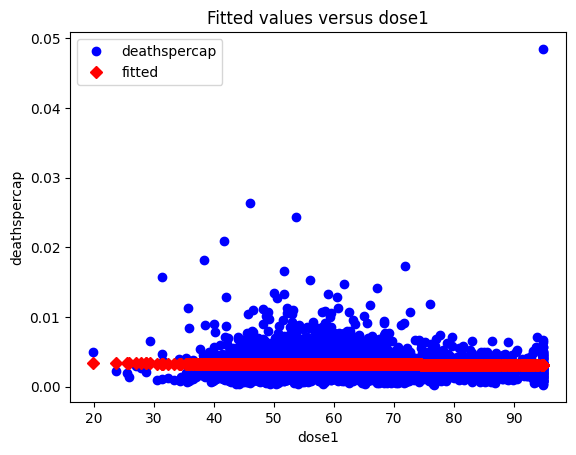

eval_env: 1
eval_env: 1


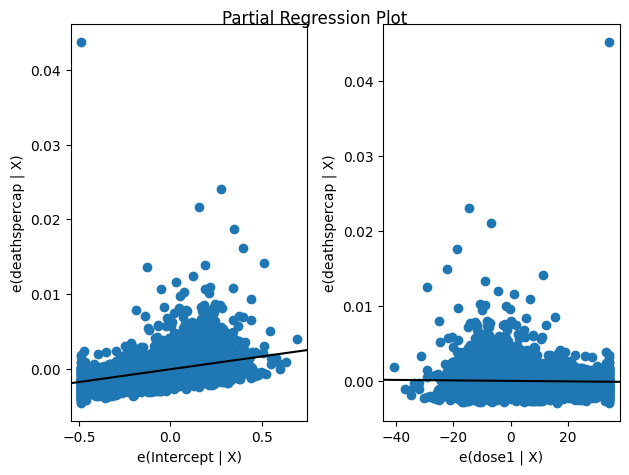

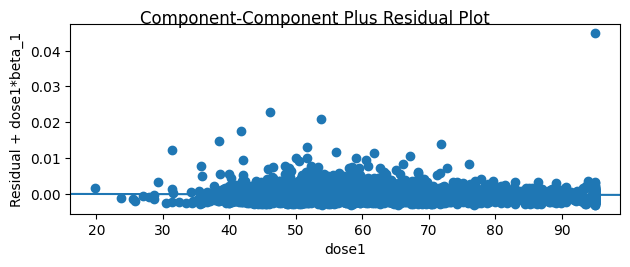

In [4]:
olsmaker(formulas[0])

FORMULA: deathspercap ~ series 

AIC is -22619.452939716088 
BIC is -22607.850975573572 
R-Squared is 0.0006339750587317505 

                            OLS Regression Results                            
Dep. Variable:           deathspercap   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.549
Date:                Sun, 23 Apr 2023   Prob (F-statistic):              0.110
Time:                        12:14:07   Log-Likelihood:                 11312.
No. Observations:                2443   AIC:                        -2.262e+04
Df Residuals:                    2441   BIC:                        -2.261e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----

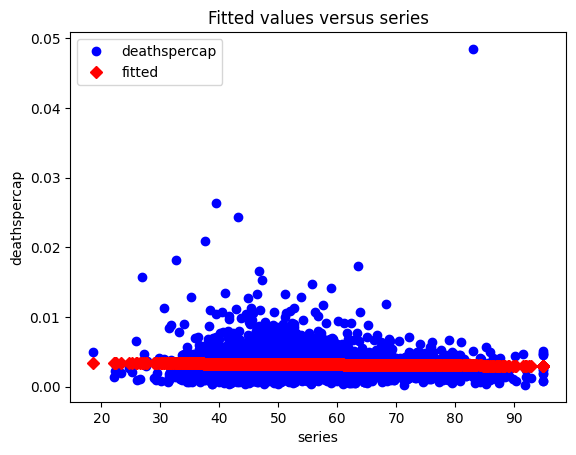

eval_env: 1
eval_env: 1


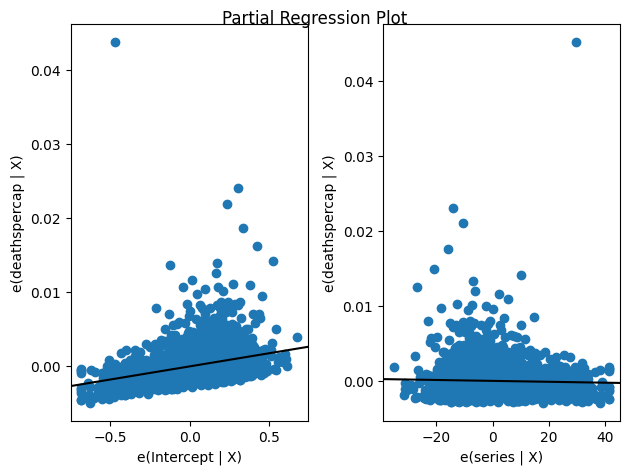

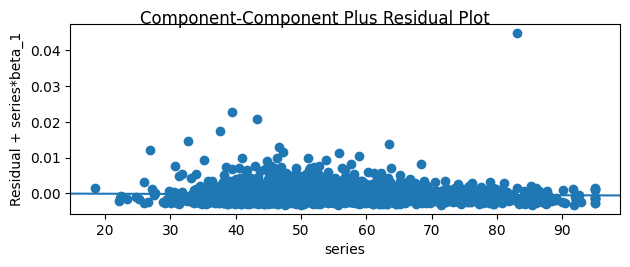

In [5]:
olsmaker(formulas[1])

FORMULA: deathspercap ~ booster 

AIC is -22667.235499751892 
BIC is -22655.633535609377 
R-Squared is 0.019990628493912088 

                            OLS Regression Results                            
Dep. Variable:           deathspercap   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     50.81
Date:                Sun, 23 Apr 2023   Prob (F-statistic):           1.33e-12
Time:                        12:14:08   Log-Likelihood:                 11336.
No. Observations:                2443   AIC:                        -2.267e+04
Df Residuals:                    2441   BIC:                        -2.266e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----

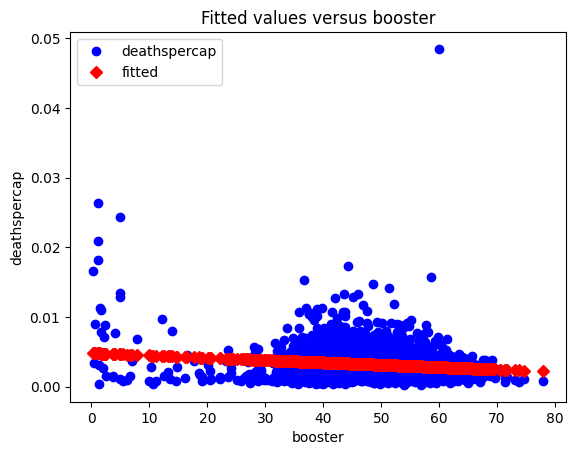

eval_env: 1
eval_env: 1


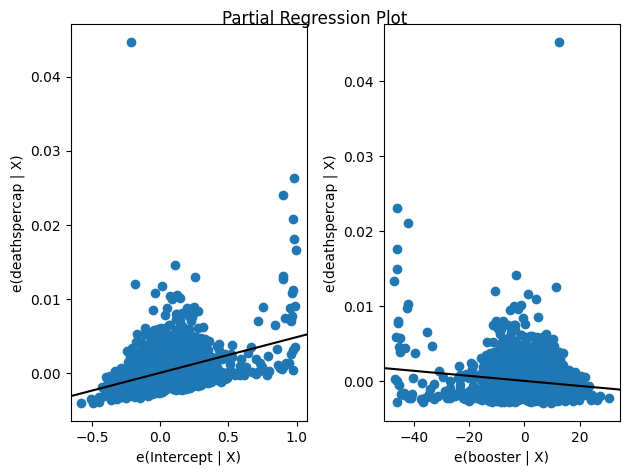

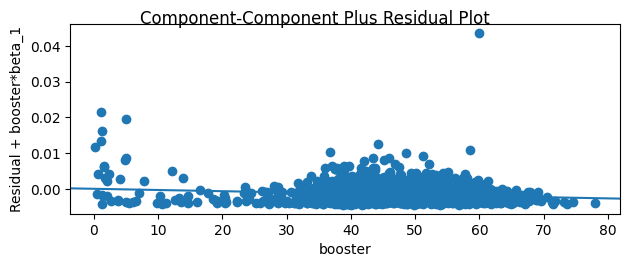

In [6]:
olsmaker(formulas[2])

FORMULA: deathspercap ~ dose1 + pop + density + percapincome 

AIC is -22631.61456774852 
BIC is -22602.60965739223 
R-Squared is 0.006815235804643827 

                            OLS Regression Results                            
Dep. Variable:           deathspercap   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     5.189
Date:                Sun, 23 Apr 2023   Prob (F-statistic):           0.000367
Time:                        12:14:08   Log-Likelihood:                 11321.
No. Observations:                2443   AIC:                        -2.263e+04
Df Residuals:                    2438   BIC:                        -2.260e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t| 

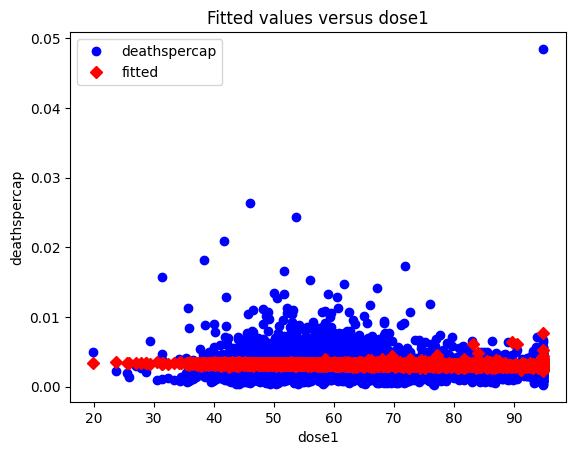

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


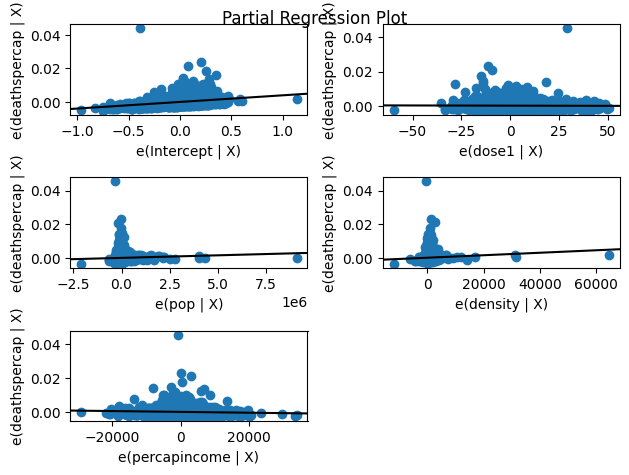

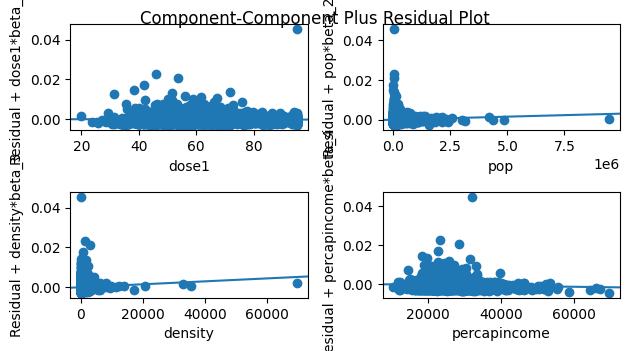

In [7]:
olsmaker(formulas[3])

FORMULA: deathspercap ~ series + pop 

AIC is -22625.002099842743 
BIC is -22607.59915362897 
R-Squared is 0.0033090557256978403 

                            OLS Regression Results                            
Dep. Variable:           deathspercap   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     5.054
Date:                Sun, 23 Apr 2023   Prob (F-statistic):            0.00645
Time:                        12:14:09   Log-Likelihood:                 11316.
No. Observations:                2443   AIC:                        -2.263e+04
Df Residuals:                    2440   BIC:                        -2.261e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]


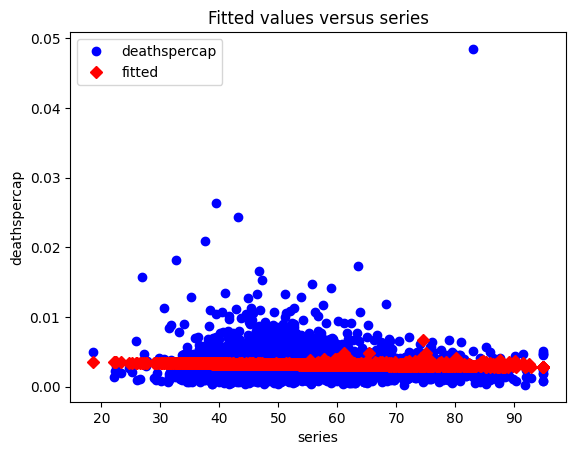

eval_env: 1
eval_env: 1
eval_env: 1


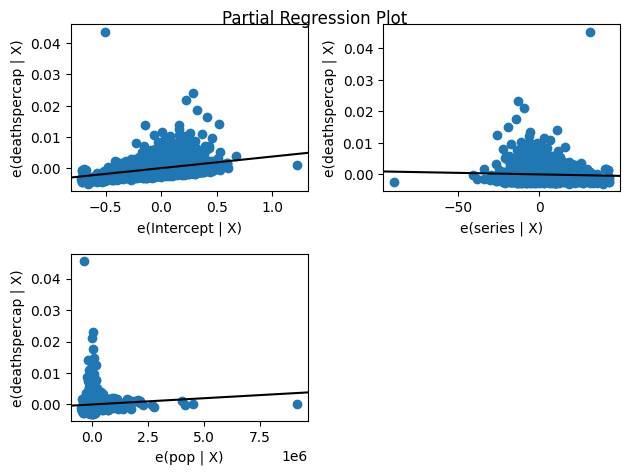

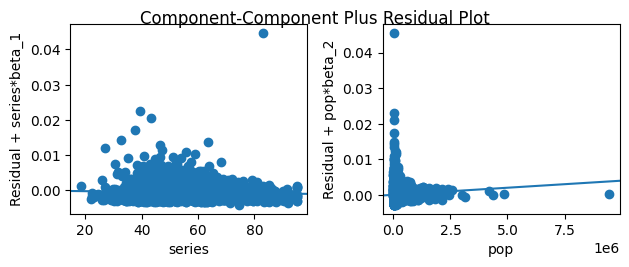

In [8]:
olsmaker(formulas[4])

FORMULA: deathspercap ~ booster + pop 

AIC is -22672.91657322982 
BIC is -22655.513627016047 
R-Squared is 0.022666669667722905 

                            OLS Regression Results                            
Dep. Variable:           deathspercap   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     29.32
Date:                Sun, 23 Apr 2023   Prob (F-statistic):           2.62e-13
Time:                        12:14:09   Log-Likelihood:                 11339.
No. Observations:                2443   AIC:                        -2.267e+04
Df Residuals:                    2440   BIC:                        -2.266e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]


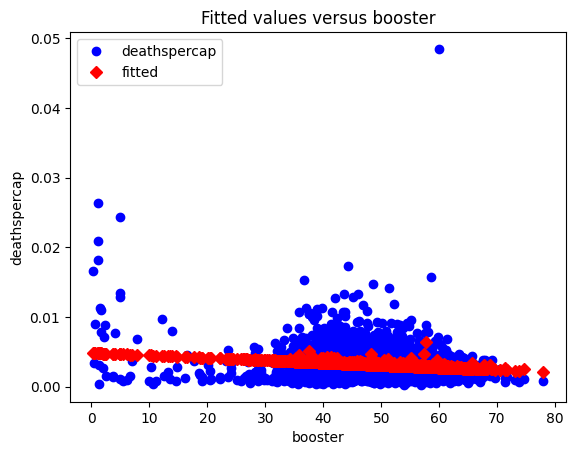

eval_env: 1
eval_env: 1
eval_env: 1


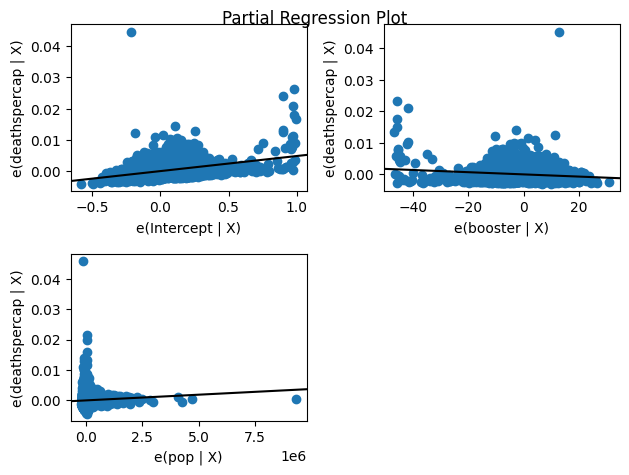

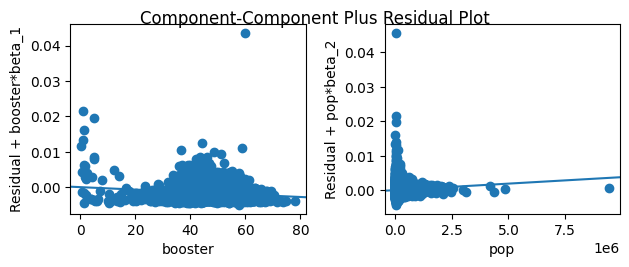

In [9]:
olsmaker(formulas[5])

## LASSO

In [10]:
dfcopy = df.iloc[:,1:]
Y = dfcopy.loc[:, "deaths"]
Xlist = []

droplist = [["dose1",["deaths","deathspercap","county","index", "deaths", "series", "booster"]],["series",["deathspercap","deaths","county","index", "deaths", "dose1", "booster"]],["booster",["deathspercap","deaths","county","index", "deaths", "dose1", "series"]]]

for typeanddrops in droplist:
    
    xtype = typeanddrops[0]
    dfcopy = df
    dfcopy = dfcopy.drop(typeanddrops[1], axis=1)
    
    Xlist.append([xtype, dfcopy, list(dfcopy.columns)])

In [11]:
from sklearn.linear_model import lasso_path
from itertools import cycle
from sklearn.preprocessing import StandardScaler #usually, we want to standardize to put in terms of standard deviations. to minimize iimpact of measurement
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoLarsCV, LassoLarsIC
import time

SC = StandardScaler()

Xns = []
for X in Xlist:
    SC.fit(X[1]) 
    Xns.append(SC.transform(X[1])) #use these statistic to standardize. Xn contains standardized x variables

def lasso(Xnum):
    print("Primary X Value:", Xlist[Xnum][0])
    # Use "eps" to specify the length and density of the grid (eps = alpha_min / alpha_max)
    eps = 1e-10  
    alphas_lasso, coefs_lasso, _ = lasso_path(Xns[Xnum], Y, eps = eps) #first, we need to select lamda values
    #eps is one of the parameters to use for finding which lamda values to use
    #eps chooses smallest lamda value
    #eps = lamda min/ lamda max
    #can use n_alphas to select number of alphas in regularization path
    #alphas_lasso is lamdas that were used, coef is lasso estimates
    # Display the solution path
    plt.figure(figsize=(8, 7), dpi=80) #define figure size
    colors = cycle(['b', 'r', 'g', 'c','m', 'y', 'k']) #coloring lines. iterates colors. k is black

    # Take the log of the alpha values to adjust the scale of X-axis
    log_alphas_lasso = np.log10(alphas_lasso) #taking log of lamdas
    
    varname = Xlist[Xnum][2]
    # Use a for-loop to plot several paths on a figure 
    for coef_l, c, vn in zip(coefs_lasso, colors, varname): #zip holds these functions temperarly. coeff lasso is parameter estimate, colors is the colors, varname is variable name.
        l1 = plt.plot(log_alphas_lasso, coef_l, c=c, label=vn) #drawing lines. coefff lasso starts with first row. 
        #in first iteragtion, selects first row of this object. then first item in color. variable name will be variable name.

    plt.xlabel('Log(alpha)')
    plt.ylabel('Coefficient Estimtes')
    plt.title('Lasso Solution Path')
    plt.legend()
    plt.show()
    #log alpha negative because they're small numbers.
    
def lassopick(Xnum, cvoraicbic):
    
    print("Primary X Value:", Xlist[Xnum][0])
    varname = Xlist[Xnum][2]
    
    if cvoraicbic == "cv":
        print("PICKING BEST MODEL BASED ON CROSS VALIDATION\n")
        t1 = time.time() # Get the current time
        lascv = LassoLarsCV(cv=5).fit(Xns[Xnum], Y) #how many chunks you break the data into. use 5 or 10 folds, include x and y
        t_lasso_lars_cv = time.time() - t1 # Calculate running time

        # Display the results
        eps = 5e-10
        lascv_log_alphas = np.log10(lascv.cv_alphas_ + eps)  #result variable.cv alphas is lamdas. alpha (singular) is lamda that is optimal. eps is different from what we used before. eps is just small number. include zero because taki9ng log of zero creates error
        lascv_log_alpha = np.log10(lascv.alpha_) #log of lamda that minimized MSE
        # Caution: lascv.alphas contains the alpha at the lowest MSE whereas lascv.cv_alphas_ contains the set of alphas used in the path
        # The smallest value in lascv.cv_alphas_ is 0 so we add eps (a small number) to avoid log(0)

        plt.figure(figsize=(8, 7), dpi=80)
        plt.plot(lascv_log_alphas, lascv.mse_path_.mean(axis=1), 'k',
                 label='Average of the MSEs over the Folds', linewidth=2)
        plt.axvline(lascv_log_alpha, linestyle='--', color='k', #add verticle line at optimal lamda
                    label='alpha selected by CV')

        plt.legend()

        plt.xlabel('Log(alpha)')
        plt.ylabel('Mean Square Error')
        plt.title('Model Selection by Cross Validation (train time: %.2fs)'
                  % t_lasso_lars_cv)
        plt.show()

        print("Best Alpha (Based on Cross Validation):", lascv_log_alpha)
        print("\nBest Model (Based on Cross Validation):")
        for varnum in range(len(varname)): print(varname[varnum],lascv.coef_[varnum])
    
    if cvoraicbic == "aicbic":
        print("PICKING BEST MODEL BASED ON AIC AND BIC\n")
        
        t1 = time.time() # Get the current time
        lascv = LassoLarsCV(cv=5).fit(Xns[Xnum], Y) #how many chunks you break the data into. use 5 or 10 folds, include x and y
        t_lasso_lars_cv = time.time() - t1 # Calculate running time

        # Display the results
        eps = 5e-10
        lascv_log_alphas = np.log10(lascv.cv_alphas_ + eps)  #result variable.cv alphas is lamdas. alpha (singular) is lamda that is optimal. eps is different from what we used before. eps is just small number. include zero because taki9ng log of zero creates error
        lascv_log_alpha = np.log10(lascv.alpha_) #log of lamda that minimized MSE
        # Caution: lascv.alphas contains the alpha at the lowest MSE whereas lascv.cv_alphas_ contains the set of alphas used in the path
        # The smallest value in lascv.cv_alphas_ is 0 so we add eps (a small number) to avoid log(0)


        lasic_bic = LassoLarsIC(criterion='bic').fit(Xns[Xnum], Y) #specify which criterian. plug in x and y. store results in these two variables
        lasic_aic = LassoLarsIC(criterion='aic').fit(Xns[Xnum], Y)

        # Display results
        # make a fn to produce figures with the same features repeatedly
        def plot_ic_criterion(model, name, color): 
            alpha_ = model.alpha_ + eps #optimal lamda
            alphas_ = model.alphas_ + eps #lamdas that were used in this function
            criterion_ = model.criterion_ # BIC or AIC values over the alpha values
            plt.plot(np.log10(alphas_), criterion_, '--', color=color,
                     linewidth=3, label='%s' % name)
            plt.axvline(np.log10(alpha_), color=color, linewidth=3, #adding vertical line
                        label='$\lambda$ selected by %s ' % name)
            plt.xlabel('Log($\lambda$)')
            plt.ylabel('Criterion Value')


        plt.figure(figsize=(8, 7), dpi=80)
        plot_ic_criterion(lasic_aic, 'AIC', 'b') #line is AIC result
        plot_ic_criterion(lasic_bic, 'BIC', 'r') #line is BIC result
        plt.legend()
        plt.title('Model Selection by Information Criteria')
        plt.show()

        print("\n\nBest Model (Based on AIC):")
        for varnum in range(len(varname)): print(varname[varnum],lasic_aic.coef_[varnum])
        print("\n\nBest Model (Based on BIC):")
        for varnum in range(len(varname)): print(varname[varnum],lasic_bic.coef_[varnum])

Primary X Value: dose1


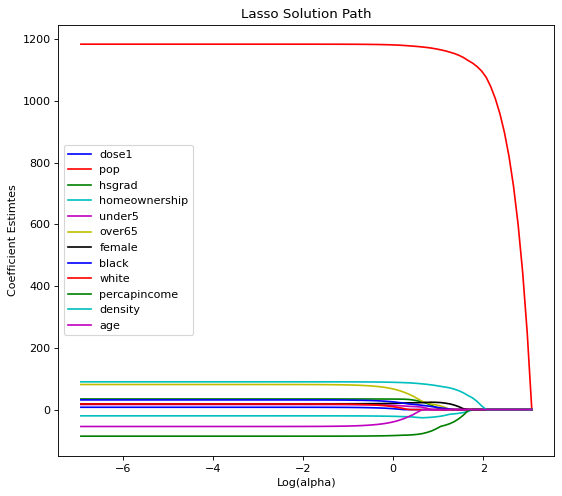

In [12]:
lasso(0)

Primary X Value: dose1
PICKING BEST MODEL BASED ON CROSS VALIDATION



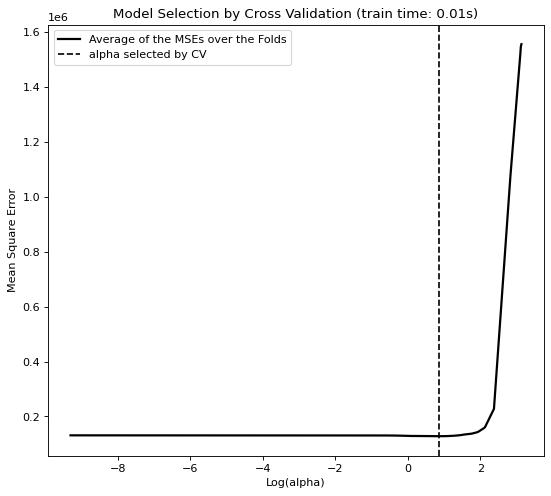

Best Alpha (Based on Cross Validation): 0.8512941554802332

Best Model (Based on Cross Validation):
dose1 0.0
pop 1171.1572456861181
hsgrad 14.122292833959706
homeownership -24.741955539629384
under5 0.0
over65 17.73852260953257
female 23.9557657153898
black 9.898854098865076
white 0.0
percapincome -69.37583195011979
density 80.079931157493
age 0.0


In [13]:
lassopick(0, "cv")

Primary X Value: dose1
PICKING BEST MODEL BASED ON AIC AND BIC



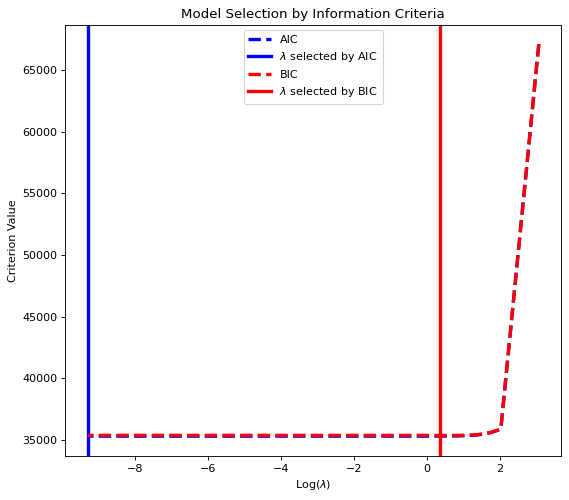



Best Model (Based on AIC):
dose1 7.590261865355643
pop 1183.8631919829893
hsgrad 34.475804652037894
homeownership -20.20646972232378
under5 16.53735436618847
over65 81.34342300881795
female 18.759619939914444
black 31.403983300282384
white 18.37986311879378
percapincome -86.0701386728049
density 89.99193550253398
age -54.689433223819854


Best Model (Based on BIC):
dose1 0.0
pop 1178.2953467331406
hsgrad 32.71680182071066
homeownership -23.263576488882386
under5 10.468527458735466
over65 49.309256381754764
female 21.883582551700748
black 17.965292294299875
white 0.0
percapincome -82.26676118545448
density 86.56062410672455
age -21.810759666375198


In [14]:
lassopick(0, "aicbic")

Primary X Value: series


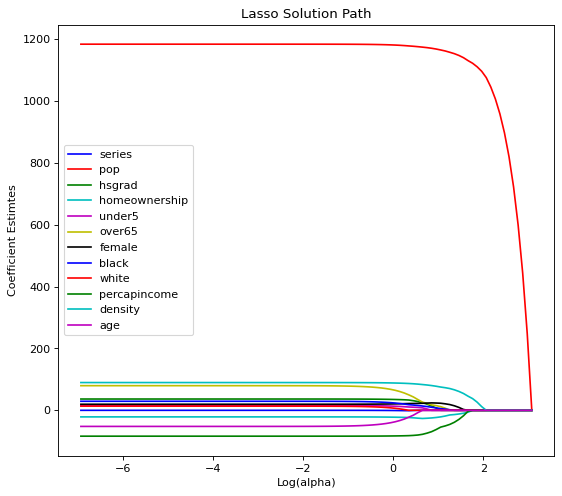

In [15]:
lasso(1)

Primary X Value: series
PICKING BEST MODEL BASED ON CROSS VALIDATION



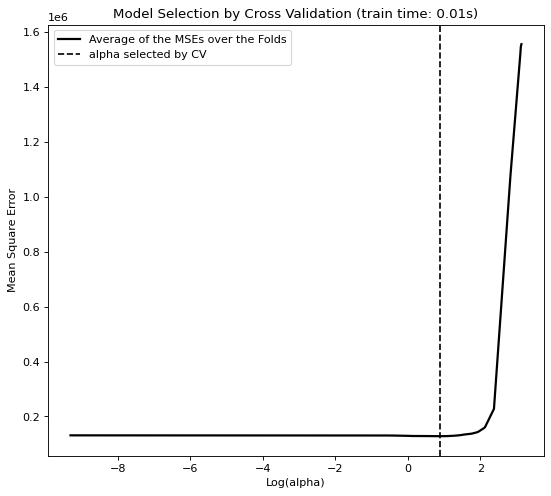

Best Alpha (Based on Cross Validation): 0.8940139973969892

Best Model (Based on Cross Validation):
series 0.0
pop 1170.1796228202227
hsgrad 11.537427443853788
homeownership -24.155482624907727
under5 0.0
over65 16.72498246010692
female 23.778699663185954
black 9.115066445535485
white 0.0
percapincome -66.68917936047339
density 79.22517105703189
age 0.0


In [16]:
lassopick(1, "cv")

Primary X Value: series
PICKING BEST MODEL BASED ON AIC AND BIC



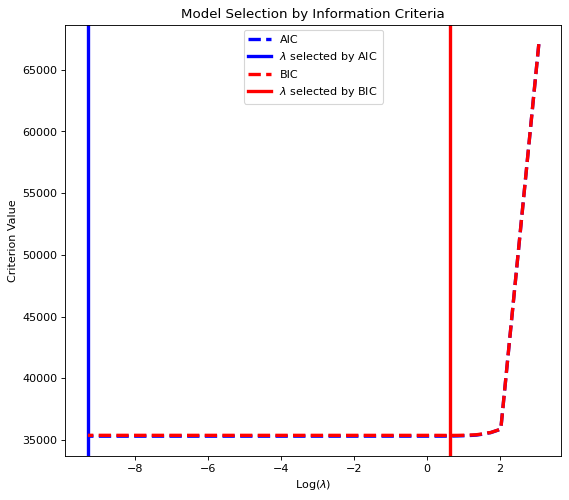



Best Model (Based on AIC):
series -0.060905900318809714
pop 1184.279656986674
hsgrad 36.488379076972855
homeownership -21.319590165901364
under5 15.906547926888159
over65 79.64460584067226
female 19.571490732330364
black 29.186523139519014
white 13.467310006479588
percapincome -83.7109770668323
density 89.74474985053973
age -52.12295422434427


Best Model (Based on BIC):
series 0.0
pop 1175.0458453317456
hsgrad 25.70077428108643
homeownership -26.587887634859353
under5 8.573521625676985
over65 27.05162424939683
female 22.57754467062435
black 14.208882810686045
white 0.0
percapincome -78.51474335318852
density 83.5965960445822
age 0.0


In [17]:
lassopick(1, "aicbic")

Primary X Value: booster


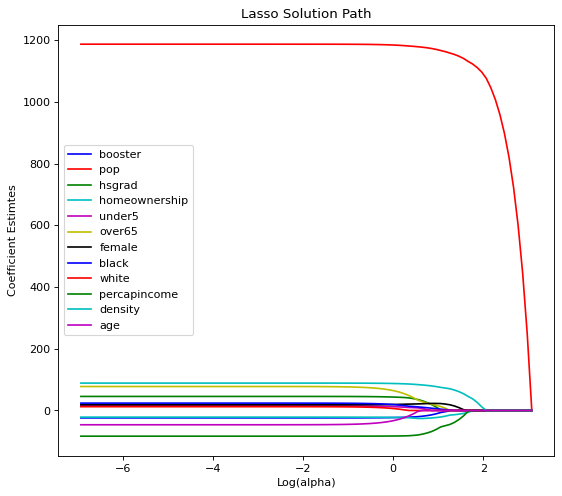

In [18]:
lasso(2)

Primary X Value: booster
PICKING BEST MODEL BASED ON CROSS VALIDATION



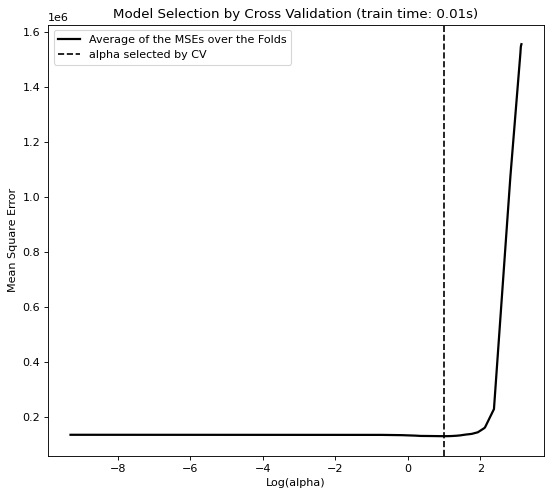

Best Alpha (Based on Cross Validation): 1.009846430166844

Best Model (Based on Cross Validation):
booster -8.682072061462108
pop 1168.0297001551173
hsgrad 6.25821141914651
homeownership -21.941885888841494
under5 0.0
over65 14.704297889091675
female 22.595612763449406
black 5.023431931884025
white 0.0
percapincome -57.32809591333645
density 76.1254281098426
age 0.0


In [19]:
lassopick(2, "cv")

Primary X Value: booster
PICKING BEST MODEL BASED ON AIC AND BIC



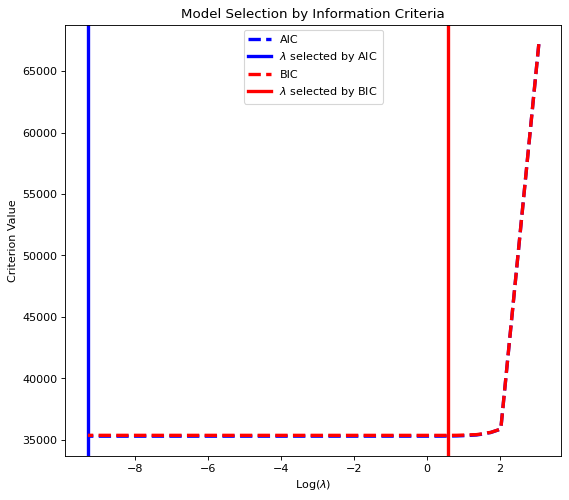



Best Model (Based on AIC):
booster -24.0570959251996
pop 1186.7930330141023
hsgrad 45.51693353964113
homeownership -21.54169981368648
under5 14.765933114276933
over65 77.71368503656358
female 18.40783082667513
black 23.856756536636524
white 12.27176759738096
percapincome -83.25241553252394
density 88.72991626334735
age -46.264153996880474


Best Model (Based on BIC):
booster -19.671842616527144
pop 1177.9294429077665
hsgrad 34.19650703632017
homeownership -26.242022154020525
under5 8.26415538704711
over65 30.322377574299914
female 21.37660967755489
black 11.112343346356138
white 0.0
percapincome -78.67183420056759
density 83.34928077021402
age 0.0


In [20]:
lassopick(2, "aicbic")

## Forwards Selection

In [21]:
def forwards(Xlistnum, criteria):
    
    global selected
             
    Xvalues=Xlist[Xlistnum]
    mode = {"AIC":2,"BIC":1,"R-Squared":0}[criteria]
    
    print("TYPE:", Xvalues[0], "CRITERIA:", criteria, "\n")
    
    X = Xvalues[1]
    Xnp = Xvalues[1].values
    ncol=X.shape[1]
    pcand = list(range(ncol)) # A list to keep track of the remaining predictors (i.e., not yet added) at each iteration
    psel = [] # A list to keep track of the selected predictors at each iteration (the order of the selected predictors)
    tb = np.zeros(ncol) # A vector to store the BIC of the selected model (combination) at each iteration
    p = 0 # Iteration idex
    addedlist=[]

    while len(psel) != ncol: # Repeat below until the model includes all the predictors
        
        tb0 = np.zeros((len(pcand),3)) # Store the Rsquare(s) and BIC(s) of the models considered at each iteration

        for i in range(0,len(pcand)):
            psel0 = psel + [pcand[i]] # "psel0" is a temporary version of psel which includes one of the predictors in pcan and those in psel
            # Caution: "+" combines two lists, but not a list and an integer (i.e pcan[i])
            XX = Xnp[:,psel0]
            XX = sm.add_constant(XX)
            model = sm.OLS(Y, XX)
            res = model.fit()
            tb0[i,:] = [res.rsquared, res.bic, res.aic]

        ind = np.argmax(tb0[:,mode]) if mode == 0 else np.argmin(tb0[:,mode])
        addedlist.append(pcand[ind])
        psel = psel + [pcand[ind]] # Add the selected regressor to psel
        pcand.remove(pcand[ind]) # Remove the selected regressor from pcand
        tb[p] =  tb0[ind,1] # Store the BIC of the selected model at this iteration
        p += 1
        
    #[print("\nMODEL NUMBER:", i, "\nThis Model Added Variable:", X.columns[addedlist[i]], "\nCriteria", criteria.upper(), "Value:", tb[i]) for i in range(len(tb))]
        
    best = np.argmax(tb)+1 if mode == 0 else np.argmin(tb)+1
    
    selected = [X.columns[i] for i in list(addedlist[:best])]
    print("SELECTED VARIABLES:", [i for i in selected])

    formula = 'deathspercap ~ '
    for variable in selected:
        formula += " +" + variable

    OLS = smf.ols(formula, data=df).fit()
    print("AIC is", OLS.aic)
    print("BIS is", OLS.bic)
    print("R-Squared is", OLS.rsquared_adj)
    print(OLS.summary())

In [22]:
forwards(0,"AIC")

TYPE: dose1 CRITERIA: AIC 

SELECTED VARIABLES: ['pop', 'density', 'percapincome', 'female', 'hsgrad', 'homeownership', 'over65']
AIC is -22903.68554348334
BIS is -22857.27768691328
R-Squared is 0.11257463655412314
                            OLS Regression Results                            
Dep. Variable:           deathspercap   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     45.25
Date:                Sun, 23 Apr 2023   Prob (F-statistic):           1.53e-60
Time:                        12:14:12   Log-Likelihood:                 11460.
No. Observations:                2443   AIC:                        -2.290e+04
Df Residuals:                    2435   BIC:                        -2.286e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                     

In [23]:
forwards(0,"BIC")

TYPE: dose1 CRITERIA: BIC 

SELECTED VARIABLES: ['pop', 'density', 'percapincome', 'female', 'hsgrad', 'homeownership', 'over65']
AIC is -22903.68554348334
BIS is -22857.27768691328
R-Squared is 0.11257463655412314
                            OLS Regression Results                            
Dep. Variable:           deathspercap   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     45.25
Date:                Sun, 23 Apr 2023   Prob (F-statistic):           1.53e-60
Time:                        12:14:12   Log-Likelihood:                 11460.
No. Observations:                2443   AIC:                        -2.290e+04
Df Residuals:                    2435   BIC:                        -2.286e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                     

In [24]:
forwards(0,"R-Squared")

TYPE: dose1 CRITERIA: R-Squared 

SELECTED VARIABLES: ['pop']
AIC is -22621.187779474625
BIS is -22609.58581533211
R-Squared is 0.0013433997298351041
                            OLS Regression Results                            
Dep. Variable:           deathspercap   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     4.285
Date:                Sun, 23 Apr 2023   Prob (F-statistic):             0.0386
Time:                        12:14:12   Log-Likelihood:                 11313.
No. Observations:                2443   AIC:                        -2.262e+04
Df Residuals:                    2441   BIC:                        -2.261e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      

In [25]:
forwards(1,"AIC")

TYPE: series CRITERIA: AIC 

SELECTED VARIABLES: ['pop', 'density', 'percapincome', 'female', 'hsgrad', 'homeownership', 'over65']
AIC is -22903.68554348334
BIS is -22857.27768691328
R-Squared is 0.11257463655412314
                            OLS Regression Results                            
Dep. Variable:           deathspercap   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     45.25
Date:                Sun, 23 Apr 2023   Prob (F-statistic):           1.53e-60
Time:                        12:14:12   Log-Likelihood:                 11460.
No. Observations:                2443   AIC:                        -2.290e+04
Df Residuals:                    2435   BIC:                        -2.286e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                    

In [26]:
forwards(1,"BIC")

TYPE: series CRITERIA: BIC 

SELECTED VARIABLES: ['pop', 'density', 'percapincome', 'female', 'hsgrad', 'homeownership', 'over65']
AIC is -22903.68554348334
BIS is -22857.27768691328
R-Squared is 0.11257463655412314
                            OLS Regression Results                            
Dep. Variable:           deathspercap   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     45.25
Date:                Sun, 23 Apr 2023   Prob (F-statistic):           1.53e-60
Time:                        12:14:12   Log-Likelihood:                 11460.
No. Observations:                2443   AIC:                        -2.290e+04
Df Residuals:                    2435   BIC:                        -2.286e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                    

In [27]:
forwards(1,"R-Squared")

TYPE: series CRITERIA: R-Squared 

SELECTED VARIABLES: ['pop']
AIC is -22621.187779474625
BIS is -22609.58581533211
R-Squared is 0.0013433997298351041
                            OLS Regression Results                            
Dep. Variable:           deathspercap   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     4.285
Date:                Sun, 23 Apr 2023   Prob (F-statistic):             0.0386
Time:                        12:14:13   Log-Likelihood:                 11313.
No. Observations:                2443   AIC:                        -2.262e+04
Df Residuals:                    2441   BIC:                        -2.261e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|     

In [28]:
forwards(2,"AIC")

TYPE: booster CRITERIA: AIC 

SELECTED VARIABLES: ['pop', 'density', 'percapincome', 'female', 'hsgrad', 'booster', 'over65', 'homeownership']
AIC is -22943.502845482675
BIS is -22891.294006841355
R-Squared is 0.12727719143271832
                            OLS Regression Results                            
Dep. Variable:           deathspercap   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                     45.52
Date:                Sun, 23 Apr 2023   Prob (F-statistic):           1.39e-68
Time:                        12:14:13   Log-Likelihood:                 11481.
No. Observations:                2443   AIC:                        -2.294e+04
Df Residuals:                    2434   BIC:                        -2.289e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                      

In [29]:
forwards(2,"BIC")

TYPE: booster CRITERIA: BIC 

SELECTED VARIABLES: ['pop', 'density', 'percapincome', 'female', 'hsgrad', 'booster', 'over65', 'homeownership']
AIC is -22943.502845482675
BIS is -22891.294006841355
R-Squared is 0.12727719143271832
                            OLS Regression Results                            
Dep. Variable:           deathspercap   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                     45.52
Date:                Sun, 23 Apr 2023   Prob (F-statistic):           1.39e-68
Time:                        12:14:13   Log-Likelihood:                 11481.
No. Observations:                2443   AIC:                        -2.294e+04
Df Residuals:                    2434   BIC:                        -2.289e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                      

In [30]:
forwards(2,"R-Squared")

TYPE: booster CRITERIA: R-Squared 

SELECTED VARIABLES: ['pop']
AIC is -22621.187779474625
BIS is -22609.58581533211
R-Squared is 0.0013433997298351041
                            OLS Regression Results                            
Dep. Variable:           deathspercap   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     4.285
Date:                Sun, 23 Apr 2023   Prob (F-statistic):             0.0386
Time:                        12:14:13   Log-Likelihood:                 11313.
No. Observations:                2443   AIC:                        -2.262e+04
Df Residuals:                    2441   BIC:                        -2.261e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|    

## Backward Selection

In [31]:
def backwards(Xnum, criteria):
    
    Xvalues = Xlist[Xnum]
    print("TYPE:", Xvalues[0], "\n")
        
    X = Xvalues[1]
    Xnp = Xvalues[1].values
    ncol=X.shape[1]

    pcand = list(range(ncol)) # A list to keep track of the remaining predictors (i.e., not yet removed) at each iteration
    psel = list(range(ncol)) # A list to keep track of the selected predictors at each iteration (the order of the selected predictors)
    tb = np.zeros(ncol) # A vector to store the AIC, BIC, or R-Squared of the selected model (combination) at each iteration
    p = 0 # Iteration idex
    removelist, fittedlist = [], []

    mode = {"AIC":2,"BIC":1,"R-Squared":0}[criteria]

    print("SELECTING MODEL BASED ON:", criteria)

    while p != ncol: # Repeat below until the model excludes all the predictors

        tb0 = np.zeros((len(pcand),3)) # Store the Rsquared(s), AIC(s),  and BIC(s) of the models considered at each iteration
        fittedlisttemp=[]

        for i in range(0,len(pcand)):

            #Try removing a variable and store resulting AIC, BIC, or R-Squared 
            pseltemp=psel
            pseltemp.remove(pcand[i])
            res = sm.OLS(Y, sm.add_constant(X.iloc[:, pseltemp])).fit()
            tb0[i,:] = [res.rsquared, res.bic, res.aic]
            fittedlisttemp.append(res)
            psel.insert(0, pcand[i])
            psel.sort()

            #print("\nTried removing the following variable:", pcand[i], "\nincluded predictors:", pseltemp, "\nAIC:", tb0[i,2], "BIC:", tb0[i,1], "R-Squared:", tb0[i,0])

        # Find the regressor that results in the best criteria when added to the model
        ind = np.argmax(tb0[:,mode]) if mode == 0 else np.argmin(tb0[:,mode])
        psel.remove(pcand[ind])
        p += 1

        #print("\nRemoving", pcand[ind], "\nWe have gone through the while statement", p, "time(s)\n--------------------------------")

        removelist.append(pcand[ind])
        pcand.remove(pcand[ind]) # Remove the selected regressor from pcand
        tb[p-1] =  tb0[ind,mode] # Store the AIC, BIC, or R-Squared of the selected model at this iteration
        fittedlist.append(fittedlisttemp[ind])

    #Finding Best Model
    best = np.argmax(tb)+1 if mode == 0 else np.argmin(tb)+1

    #[print("\nMODEL NUMBER:", i, "\nThis Model Removed Variable:", removelist[i], "\nCriteria", criteria.upper(), "Value:", tb[i]) for i in range(len(tb))]

    #Printing Results
    print("\nFINAL MODEL INFORMATION\n\nFinal Model Kept These Variables (in order of removal):")
    for i in removelist[best:]: print("Variable Numer #"+str(i+1)+" - " + X.columns[i])
    print("\nFinal Model Removed These Variables:")
    for i in removelist[:best]: print("Variable Number #"+str(i+1)+" - " + X.columns[i]) 
    print(""); print(str("Final Model's "+criteria.upper())+str(": ")+str(tb[best]))

    selected = [X.columns[i] for i in list(removelist[best:])]
    print("SELECTED VARIABLES:", [i for i in selected])

    formula = 'deathspercap ~ '
    for variable in selected:
        formula += " +" + variable

    OLS = smf.ols(formula, data=df).fit()
    print("AIC is", OLS.aic)
    print("BIS is", OLS.bic)
    print("R-Squared is", OLS.rsquared_adj)
    print(OLS.summary())

In [32]:
backwards(0, "AIC")

TYPE: dose1 

SELECTING MODEL BASED ON: AIC

FINAL MODEL INFORMATION

Final Model Kept These Variables (in order of removal):
Variable Numer #4 - homeownership
Variable Numer #8 - black
Variable Numer #3 - hsgrad
Variable Numer #12 - age
Variable Numer #6 - over65
Variable Numer #7 - female
Variable Numer #10 - percapincome
Variable Numer #11 - density
Variable Numer #2 - pop

Final Model Removed These Variables:
Variable Number #1 - dose1
Variable Number #9 - white
Variable Number #5 - under5

Final Model's AIC: 35314.45675859424
SELECTED VARIABLES: ['homeownership', 'black', 'hsgrad', 'age', 'over65', 'female', 'percapincome', 'density', 'pop']
AIC is -22914.923413959994
BIS is -22856.913593247416
R-Squared is 0.1173676466568282
                            OLS Regression Results                            
Dep. Variable:           deathspercap   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.117
Method:               

In [33]:
backwards(0, "BIC")

TYPE: dose1 

SELECTING MODEL BASED ON: BIC

FINAL MODEL INFORMATION

Final Model Kept These Variables (in order of removal):
Variable Numer #8 - black
Variable Numer #3 - hsgrad
Variable Numer #12 - age
Variable Numer #6 - over65
Variable Numer #7 - female
Variable Numer #10 - percapincome
Variable Numer #11 - density
Variable Numer #2 - pop

Final Model Removed These Variables:
Variable Number #1 - dose1
Variable Number #9 - white
Variable Number #5 - under5
Variable Number #4 - homeownership

Final Model's BIC: 35369.9990681986
SELECTED VARIABLES: ['black', 'hsgrad', 'age', 'over65', 'female', 'percapincome', 'density', 'pop']
AIC is -22818.242577951765
BIS is -22766.033739310446
R-Squared is 0.08136293186088817
                            OLS Regression Results                            
Dep. Variable:           deathspercap   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares 

In [34]:
backwards(0, "R-Squared")

TYPE: dose1 

SELECTING MODEL BASED ON: R-Squared

FINAL MODEL INFORMATION

Final Model Kept These Variables (in order of removal):
Variable Numer #9 - white
Variable Numer #5 - under5
Variable Numer #4 - homeownership
Variable Numer #8 - black
Variable Numer #3 - hsgrad
Variable Numer #12 - age
Variable Numer #6 - over65
Variable Numer #7 - female
Variable Numer #10 - percapincome
Variable Numer #11 - density
Variable Numer #2 - pop

Final Model Removed These Variables:
Variable Number #1 - dose1

Final Model's R-SQUARED: 0.9289352929186367
SELECTED VARIABLES: ['white', 'under5', 'homeownership', 'black', 'hsgrad', 'age', 'over65', 'female', 'percapincome', 'density', 'pop']
AIC is -22935.033367014825
BIS is -22865.42158215973
R-Squared is 0.12531648201646595
                            OLS Regression Results                            
Dep. Variable:           deathspercap   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                

In [35]:
backwards(1, "AIC")

TYPE: series 

SELECTING MODEL BASED ON: AIC

FINAL MODEL INFORMATION

Final Model Kept These Variables (in order of removal):
Variable Numer #4 - homeownership
Variable Numer #8 - black
Variable Numer #3 - hsgrad
Variable Numer #12 - age
Variable Numer #6 - over65
Variable Numer #7 - female
Variable Numer #10 - percapincome
Variable Numer #11 - density
Variable Numer #2 - pop

Final Model Removed These Variables:
Variable Number #1 - series
Variable Number #9 - white
Variable Number #5 - under5

Final Model's AIC: 35314.45675859424
SELECTED VARIABLES: ['homeownership', 'black', 'hsgrad', 'age', 'over65', 'female', 'percapincome', 'density', 'pop']
AIC is -22914.923413959994
BIS is -22856.913593247416
R-Squared is 0.1173676466568282
                            OLS Regression Results                            
Dep. Variable:           deathspercap   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.117
Method:             

In [36]:
backwards(1, "BIC")

TYPE: series 

SELECTING MODEL BASED ON: BIC

FINAL MODEL INFORMATION

Final Model Kept These Variables (in order of removal):
Variable Numer #8 - black
Variable Numer #3 - hsgrad
Variable Numer #12 - age
Variable Numer #6 - over65
Variable Numer #7 - female
Variable Numer #10 - percapincome
Variable Numer #11 - density
Variable Numer #2 - pop

Final Model Removed These Variables:
Variable Number #1 - series
Variable Number #9 - white
Variable Number #5 - under5
Variable Number #4 - homeownership

Final Model's BIC: 35369.9990681986
SELECTED VARIABLES: ['black', 'hsgrad', 'age', 'over65', 'female', 'percapincome', 'density', 'pop']
AIC is -22818.242577951765
BIS is -22766.033739310446
R-Squared is 0.08136293186088817
                            OLS Regression Results                            
Dep. Variable:           deathspercap   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Square

In [37]:
backwards(1, "R-Squared")

TYPE: series 

SELECTING MODEL BASED ON: R-Squared

FINAL MODEL INFORMATION

Final Model Kept These Variables (in order of removal):
Variable Numer #9 - white
Variable Numer #5 - under5
Variable Numer #4 - homeownership
Variable Numer #8 - black
Variable Numer #3 - hsgrad
Variable Numer #12 - age
Variable Numer #6 - over65
Variable Numer #7 - female
Variable Numer #10 - percapincome
Variable Numer #11 - density
Variable Numer #2 - pop

Final Model Removed These Variables:
Variable Number #1 - series

Final Model's R-SQUARED: 0.9289352929186367
SELECTED VARIABLES: ['white', 'under5', 'homeownership', 'black', 'hsgrad', 'age', 'over65', 'female', 'percapincome', 'density', 'pop']
AIC is -22935.033367014825
BIS is -22865.42158215973
R-Squared is 0.12531648201646595
                            OLS Regression Results                            
Dep. Variable:           deathspercap   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:              

In [38]:
backwards(2, "AIC")

TYPE: booster 

SELECTING MODEL BASED ON: AIC

FINAL MODEL INFORMATION

Final Model Kept These Variables (in order of removal):
Variable Numer #4 - homeownership
Variable Numer #8 - black
Variable Numer #1 - booster
Variable Numer #3 - hsgrad
Variable Numer #12 - age
Variable Numer #6 - over65
Variable Numer #7 - female
Variable Numer #10 - percapincome
Variable Numer #11 - density
Variable Numer #2 - pop

Final Model Removed These Variables:
Variable Number #9 - white
Variable Number #5 - under5

Final Model's AIC: 35307.45462177779
SELECTED VARIABLES: ['homeownership', 'black', 'booster', 'hsgrad', 'age', 'over65', 'female', 'percapincome', 'density', 'pop']
AIC is -22949.185110107865
BIS is -22885.37430732403
R-Squared is 0.13001432016475045
                            OLS Regression Results                            
Dep. Variable:           deathspercap   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.130
Method: 

In [39]:
backwards(2, "BIC")

TYPE: booster 

SELECTING MODEL BASED ON: BIC

FINAL MODEL INFORMATION

Final Model Kept These Variables (in order of removal):
Variable Numer #1 - booster
Variable Numer #3 - hsgrad
Variable Numer #12 - age
Variable Numer #6 - over65
Variable Numer #7 - female
Variable Numer #10 - percapincome
Variable Numer #11 - density
Variable Numer #2 - pop

Final Model Removed These Variables:
Variable Number #9 - white
Variable Number #5 - under5
Variable Number #4 - homeownership
Variable Number #8 - black

Final Model's BIC: 35369.9990681986
SELECTED VARIABLES: ['booster', 'hsgrad', 'age', 'over65', 'female', 'percapincome', 'density', 'pop']
AIC is -22843.37324450456
BIS is -22791.16440586324
R-Squared is 0.09076433486852509
                            OLS Regression Results                            
Dep. Variable:           deathspercap   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squa

In [40]:
backwards(2, "R-Squared")

TYPE: booster 

SELECTING MODEL BASED ON: R-Squared

FINAL MODEL INFORMATION

Final Model Kept These Variables (in order of removal):
Variable Numer #5 - under5
Variable Numer #4 - homeownership
Variable Numer #8 - black
Variable Numer #1 - booster
Variable Numer #3 - hsgrad
Variable Numer #12 - age
Variable Numer #6 - over65
Variable Numer #7 - female
Variable Numer #10 - percapincome
Variable Numer #11 - density
Variable Numer #2 - pop

Final Model Removed These Variables:
Variable Number #9 - white

Final Model's R-SQUARED: 0.9291571356524695
SELECTED VARIABLES: ['under5', 'homeownership', 'black', 'booster', 'hsgrad', 'age', 'over65', 'female', 'percapincome', 'density', 'pop']
AIC is -22954.60400156785
BIS is -22884.99221671276
R-Squared is 0.13229549488793046
                            OLS Regression Results                            
Dep. Variable:           deathspercap   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:           

## K-Means Clustering

In [41]:
Xclustering=df[['dose1', 'series','booster']]
Xclustering

dose1  series  booster
0      79.2    70.6     49.4
1      73.9    68.7     51.4
2      71.0    63.8     40.9
3      86.9    79.5     59.4
4      55.5    49.9     51.8
...     ...     ...      ...
2438   44.4    38.8     48.7
2439   61.5    52.4     42.8
2440   95.0    95.0     50.9
2441   62.8    53.6     42.4
2442   48.1    45.0     51.1

[2443 rows x 3 columns]

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


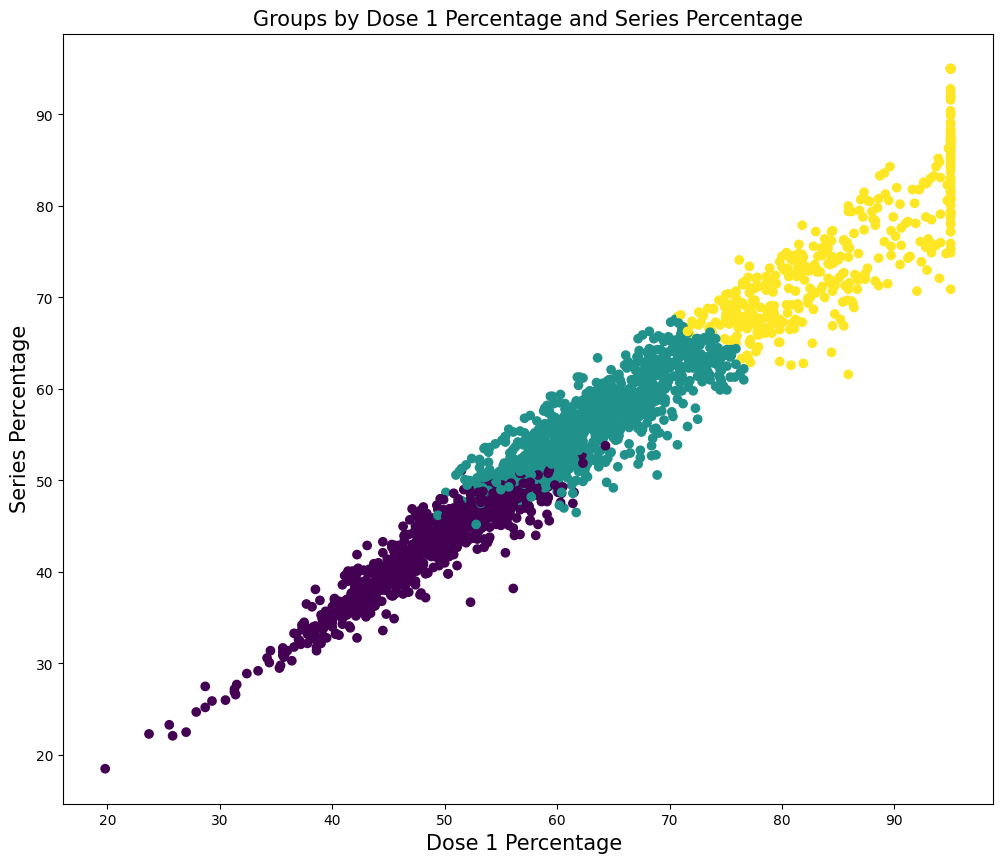

In [42]:
from sklearn.cluster import KMeans
KMres = KMeans(n_clusters=3, random_state=0).fit(Xclustering)
y_pred = KMres.predict(Xclustering)

# Visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
plt.scatter(Xclustering.iloc[:,0], Xclustering.iloc[:,1], c=y_pred) 

    
plt.xlabel('Dose 1 Percentage ',fontsize = 15)
plt.ylabel('Series Percentage',fontsize = 15)
plt.title('Groups by Dose 1 Percentage and Series Percentage',fontsize = 15)
    
plt.show()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in

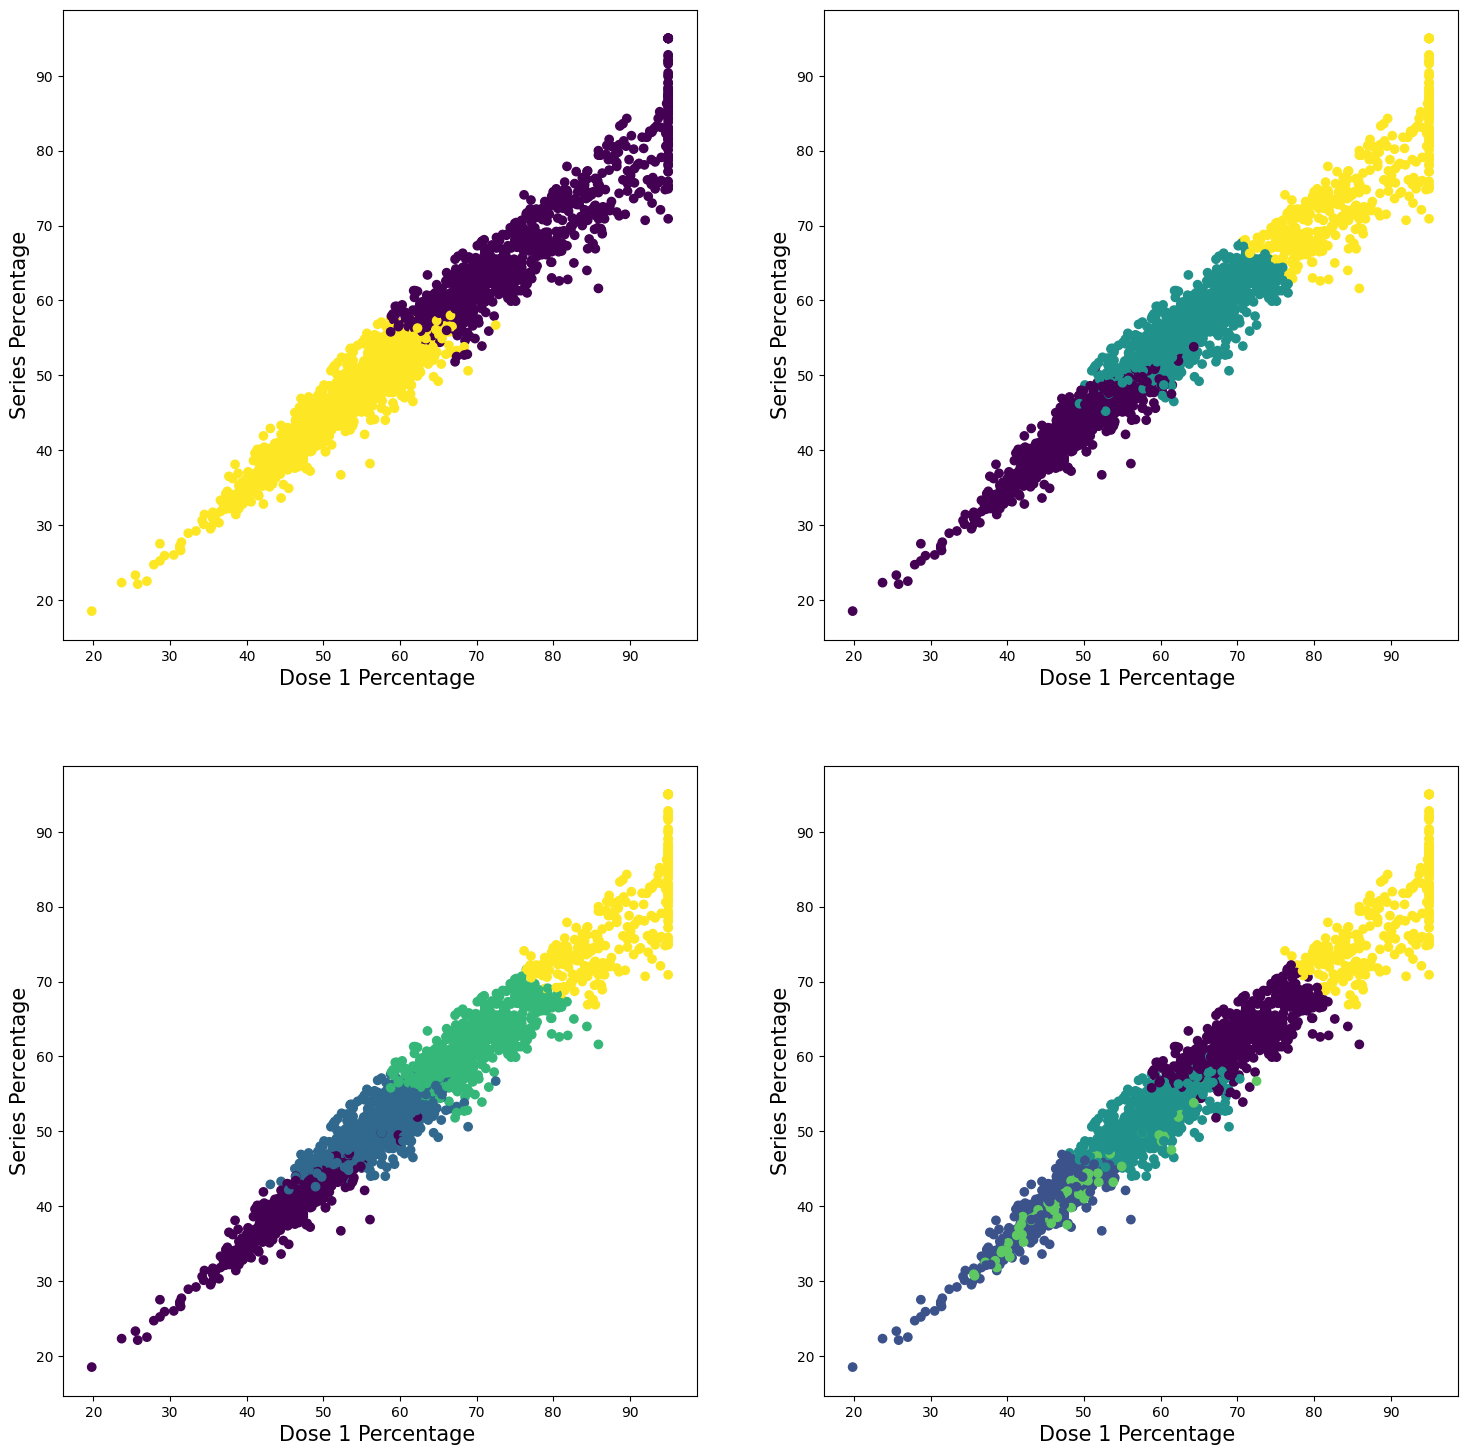

In [43]:
plt.figure(figsize=(18, 18))

for i in range(1,5):
    plt.subplot(2,2,i)
    KMres = KMeans(n_clusters=i+1, random_state=0).fit(Xclustering)
    y_pred = KMres.predict(Xclustering)

    plt.scatter(Xclustering.iloc[:,0], Xclustering.iloc[:,1], c=y_pred) 
    plt.xlabel('Dose 1 Percentage ',fontsize = 15)
    plt.ylabel('Series Percentage',fontsize = 15)

plt.show()

### Dendogram

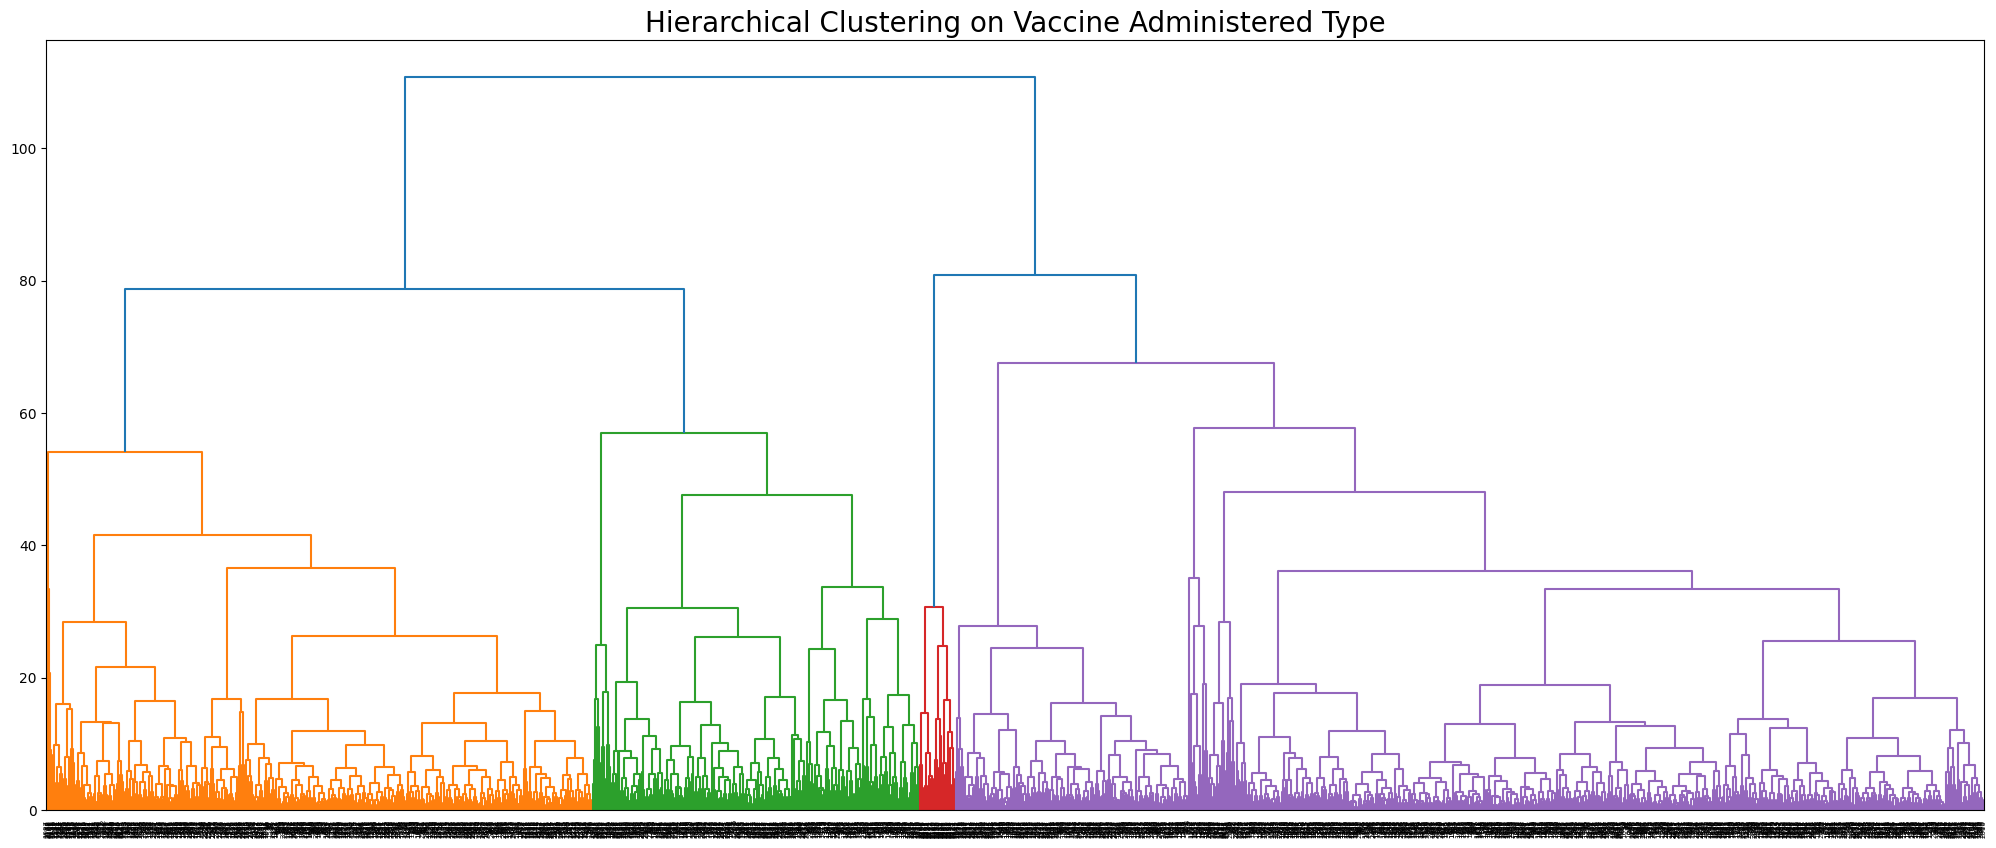

In [44]:
from scipy.cluster import hierarchy

Z = hierarchy.linkage(Xclustering, 'complete') 

plt.figure(figsize=(25, 10))
hierarchy.dendrogram(Z,)
                     
plt.title('Hierarchical Clustering on Vaccine Administered Type', size=20)           
plt.show()

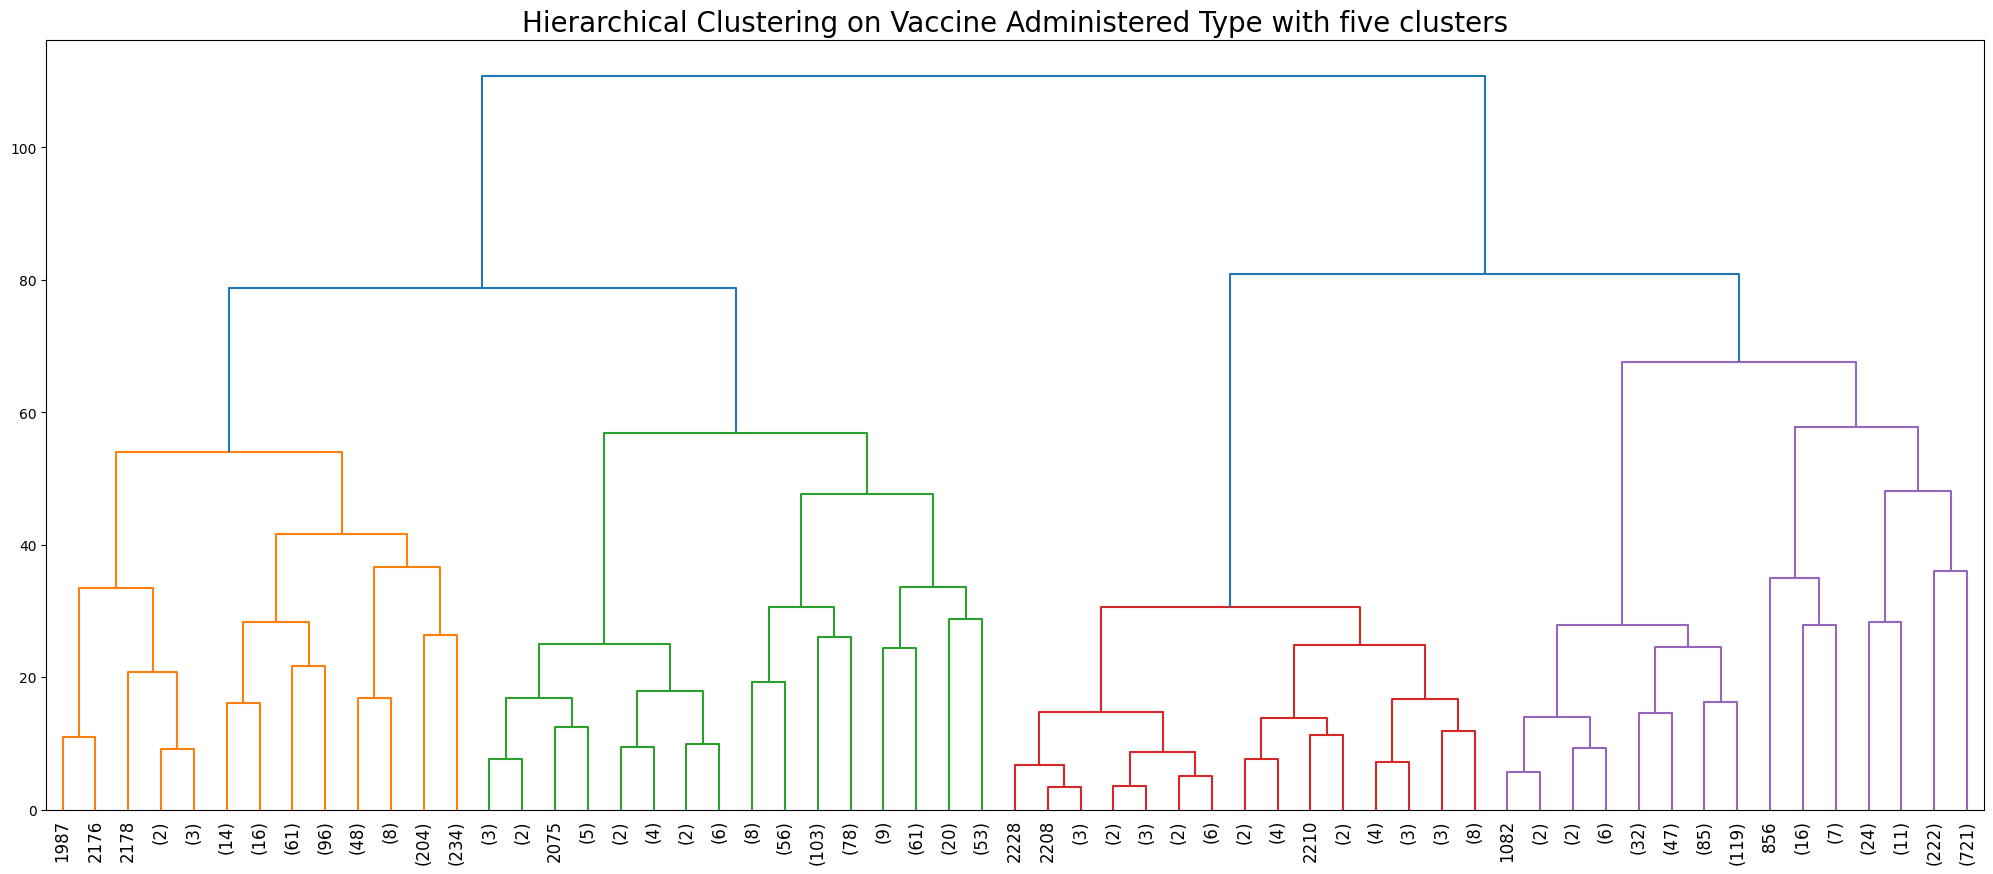

In [45]:
plt.figure(figsize=(25, 10))
hierarchy.dendrogram(Z,
                     truncate_mode='level', # The other option: 'lastp' - show only p branches
                     p = 5, # number of clusters
                     leaf_rotation=90,
                     leaf_font_size=12,
                     
                     )
                     
plt.title('Hierarchical Clustering on Vaccine Administered Type with five clusters', size=20)          
plt.show()

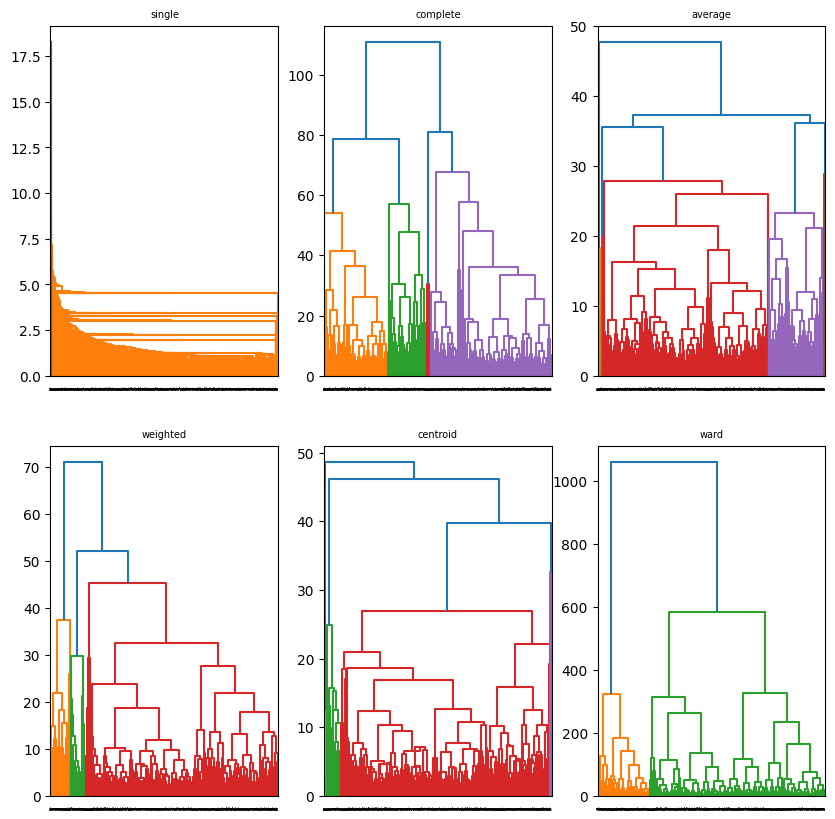

In [46]:
from matplotlib import gridspec

plt.figure(figsize=(10, 10))

i=1

for hiertype in ['single', 'complete', 'average', 'weighted', 'centroid', 'ward']:
    
    plt.subplot(2,3,i)
    
    Z = hierarchy.linkage(Xclustering, hiertype) 

    hierarchy.dendrogram(Z, leaf_rotation=90, leaf_font_size=.2, )

    plt.title(hiertype, size=7)
    
    i+=1

plt.show()

### Running regression based off dummy groups

In [52]:
import matplotlib.patches as mpatches

def clusterreg(num):
    
    kmeans = KMeans(n_clusters=num, random_state=0).fit(Xclustering)
    labels = list(kmeans.labels_)

    dftemp = df
    dftemp['label'] = labels
    groups = dftemp.groupby('label')

    fig, ax = plt.subplots()
    #ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
    for name, group in groups:
        ax.plot(group.dose1, group.series, marker='o', linestyle='', ms=2, label=name)
    ax.legend()
    plt.xlabel('Dose 1 Percentage ',fontsize = 15)
    plt.ylabel('Series Percentage',fontsize = 15)
    plt.title('Groups by Dose 1 Percentage and Series Percentage',fontsize = 15)
    plt.show()
    
    OLS3 = smf.ols("deathspercap ~ label", data=dftemp).fit()
    print("\n\n\n\nAIC is", OLS3.aic, "\nBIS is", OLS3.bic, "\nR-Squared is", OLS3.rsquared_adj, "\n")
    print(OLS3.summary())

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


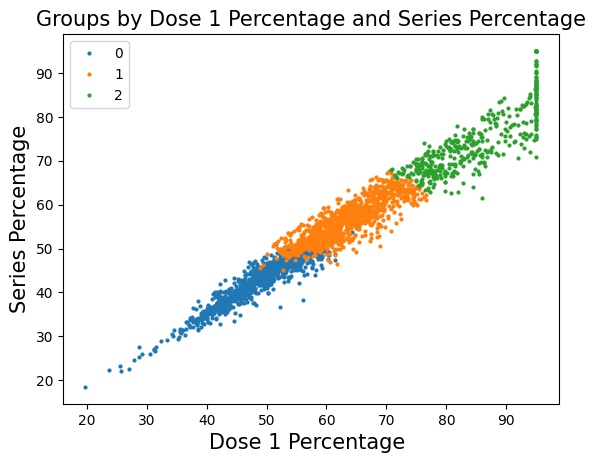





AIC is -22617.480826312363 
BIS is -22605.878862169848 
R-Squared is -0.00017308954929418086 

                            OLS Regression Results                            
Dep. Variable:           deathspercap   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.5774
Date:                Sun, 23 Apr 2023   Prob (F-statistic):              0.447
Time:                        12:16:34   Log-Likelihood:                 11311.
No. Observations:                2443   AIC:                        -2.262e+04
Df Residuals:                    2441   BIC:                        -2.261e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

In [53]:
clusterreg(3)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


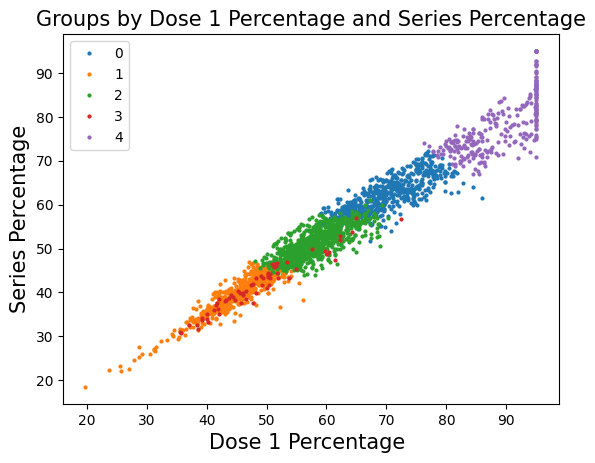





AIC is -22620.40027010088 
BIS is -22608.798305958364 
R-Squared is 0.0010214274804987156 

                            OLS Regression Results                            
Dep. Variable:           deathspercap   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.497
Date:                Sun, 23 Apr 2023   Prob (F-statistic):             0.0616
Time:                        12:15:42   Log-Likelihood:                 11312.
No. Observations:                2443   AIC:                        -2.262e+04
Df Residuals:                    2441   BIC:                        -2.261e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [49]:
clusterreg(5)